<a href="https://colab.research.google.com/github/DomSarr/data_science_example_1/blob/main/Panda/DataFrame_DataSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
pd.__version__


'2.2.2'

# pd.Series

In [ ]:
s = pd.Series(data=[3,2,4,6])
s

,0
0,3
1,2
2,4
3,6


In [ ]:
s = pd.Series(data=[3,2,4,6], index=['a','b','c','d'], name='sample')
s


,sample
a,3
b,2
c,4
d,6


In [2]:
import numpy as np

np.nan - wstawiamy gdy brak wartości, sam odszukuje typ danych

In [ ]:
s = pd.Series(data=[3.,np.nan,4,6], index=['a','b','c','d'], name='sample')
s


,sample
a,3.0
b,NaN
c,4.0
d,6.0


In [ ]:
s = pd.Series(data=[True,False,False])
s

,0
0,True
1,False
2,False


wstawianie daty oraz skoku

In [ ]:
s = pd.Series(data=np.arange(10,20), index=pd.date_range(start='20200101',periods=10))
s

,0
2020-01-01,10
2020-01-02,11
2020-01-03,12
2020-01-04,13
2020-01-05,14
2020-01-06,15
2020-01-07,16
2020-01-08,17
2020-01-09,18
2020-01-10,19


In [ ]:
s.index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
list(s.index)

[Timestamp('2020-01-01 00:00:00'),
 Timestamp('2020-01-02 00:00:00'),
 Timestamp('2020-01-03 00:00:00'),
 Timestamp('2020-01-04 00:00:00'),
 Timestamp('2020-01-05 00:00:00'),
 Timestamp('2020-01-06 00:00:00'),
 Timestamp('2020-01-07 00:00:00'),
 Timestamp('2020-01-08 00:00:00'),
 Timestamp('2020-01-09 00:00:00'),
 Timestamp('2020-01-10 00:00:00')]

In [ ]:
s = pd.Series(data=['python','java','sql'], name='languages')
s

,languages
0,python
1,java
2,sql


In [ ]:
s.values

array(['python', 'java', 'sql'], dtype=object)

O jak object


In [ ]:
s.dtypes

dtype('O')

kształt, 3 wiersze

In [ ]:
s.shape

(3,)

# Wycinanie

Nawiasy skośne bo zaczynamy użwać słownika

In [ ]:
price = pd.Series(data={'Apple':200,'CD Projekt':60, 'Amazon':1900,'KGHM':np.nan})
price

,0
Apple,200.0
CD Projekt,60.0
Amazon,1900.0
KGHM,NaN


Szukanie po nazwie

In [ ]:
price['CD Projekt']

np.int64(60)

Szukanie po indeksie

In [ ]:
price[1]

<ipython-input-28-36dbb2ffbeb5>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  price[1]


np.int64(60)

Liczenie obiektów

In [ ]:
price.count()

np.int64(3)

Sprawdzanie ile razy dana pojawiła się, można dodać również ile jest brakujących danych

In [ ]:
price.value_counts(dropna=False)

,count
200.0,1
60.0,1
1900.0,1
NaN,1


In [ ]:
price.sum()

np.int64(2160)

In [ ]:
price.max()

1900

In [ ]:
price.std()

1024.3046421841502

Ogólne dane statystyczne

In [ ]:
price.describe()

,0
count,3.000000
mean,720.000000
std,1024.304642
min,60.000000
25%,130.000000
50%,200.000000
75%,1050.000000
max,1900.000000


Wyszukanie n-ilości najwyższych wartości

In [ ]:
price.nlargest(2)

,0
Amazon,1900.0
Apple,200.0


In [ ]:
price.nsmallest(1)

,0
CD Projekt,60.0


Ranking wartości

In [ ]:
price.rank()

,0
Apple,2.0
CD Projekt,1.0
Amazon,3.0
KGHM,NaN


Sortowanie po wielkości

In [ ]:
price.sort_values()

,0
CD Projekt,60.0
Apple,200.0
Amazon,1900.0
KGHM,NaN


In [ ]:
price.sort_values(ascending=False)

,0
Amazon,1900.0
Apple,200.0
CD Projekt,60.0
KGHM,NaN


funkcja apply

In [ ]:
price_pln =price.apply(lambda x:x*3.8)
price_pln

,0
Apple,760.0
CD Projekt,228.0
Amazon,7220.0
KGHM,NaN


# DataFrame

In [ ]:
df = pd.DataFrame(data=[12,12,32])
df

,0
0,12
1,12
2,32


In [ ]:
df = pd.DataFrame(data=[12,12,32], index=['first','second','third'], columns=['col_1'])
df

,col_1
first,12
second,12
third,32


In [ ]:
df = pd.DataFrame(data={'WIG20':['PKN ORLEN','PKO BP'],
                        'mWIG40':['Amica','Playway']})
df

,WIG20,mWIG40
0,PKN ORLEN,Amica
1,PKO BP,Playway


In [ ]:
df = pd.DataFrame(data=[[10,12,13],[23,12,10]], index=['first','second'], columns=['col_1','col_2','col_3'])
df

,col_1,col_2,col_3
first,10,12,13
second,23,12,10


In [ ]:
df.columns

Index(['col_1', 'col_2', 'col_3'], dtype='object')

In [ ]:
df.index

Index(['first', 'second'], dtype='object')

In [ ]:
df.values

array([[10, 12, 13],
       [23, 12, 10]])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, first to second
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   col_1   2 non-null      int64
 1   col_2   2 non-null      int64
 2   col_3   2 non-null      int64
dtypes: int64(3)
memory usage: 172.0+ bytes


In [ ]:
df.describe()

,col_1,col_2,col_3
count,2.000000,2.0,2.00000
mean,16.500000,12.0,11.50000
std,9.192388,0.0,2.12132
min,10.000000,12.0,10.00000
25%,13.250000,12.0,10.75000
50%,16.500000,12.0,11.50000
75%,19.750000,12.0,12.25000
max,23.000000,12.0,13.00000


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
col_1,2.0,16.5,9.192388,10.0,13.25,16.5,19.75,23.0
col_2,2.0,12.0,0.000000,12.0,12.00,12.0,12.00,12.0
col_3,2.0,11.5,2.121320,10.0,10.75,11.5,12.25,13.0


# Selekcja kolumn

In [ ]:
df['col_1']

,col_1
first,10
second,23


In [ ]:
df['col_1']

,col_1
first,10
second,23


Wyciął nam obiekt Series

In [ ]:
type(df['col_1'])

pandas.core.series.Series

Wyciął obiekt Frame, podwójny nawias kwadratowy

In [ ]:
df[['col_1']]

,col_1
first,10
second,23


Zmiana nazwy kolumn

In [ ]:
df.columns = ['a','b','c']
df

,a,b,c
first,10,12,13
second,23,12,10


Wycinanie kolumny


In [ ]:
df.a

,a
first,10
second,23


Dodawanie nowej kolumny

In [ ]:
df['d']= df.a + df.c
df

,a,b,c,d
first,10,12,13,23
second,23,12,10,33


In [ ]:
df = pd.DataFrame(data=[[10,12,13],[23,12,10]], index=['first','second'], columns=['col_1','col_2','col_3'])
df

,col_1,col_2,col_3
first,10,12,13
second,23,12,10


Wycinanie inna funkcja można po nazwie lub po indeksie

In [ ]:
df.loc['first']

,first
col_1,10
col_2,12
col_3,13


In [ ]:
df.iloc[0]

,first
col_1,10
col_2,12
col_3,13


In [ ]:
df.loc['first','col_2']

np.int64(12)

In [ ]:
df.loc[:,'col_2']

,col_2
first,12
second,12


# obliczanie nowych kolumn

In [30]:


def fetch_financial_data(company='UBER'):
    """Pobiera dane dotyczące notowań spółek na giełdzie według symboli
    na serwisie stooq.pl"""
    import pandas_datareader.data as web
    return web.DataReader(name=company, data_source='stooq')

df = fetch_financial_data()
df.info()



<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1257 entries, 2025-04-25 to 2020-04-27
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1257 non-null   float64
 1   High    1257 non-null   float64
 2   Low     1257 non-null   float64
 3   Close   1257 non-null   float64
 4   Volume  1257 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 58.9 KB


In [31]:
df = fetch_financial_data('UBER')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1257 entries, 2025-04-25 to 2020-04-27
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1257 non-null   float64
 1   High    1257 non-null   float64
 2   Low     1257 non-null   float64
 3   Close   1257 non-null   float64
 4   Volume  1257 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 58.9 KB


In [32]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2025-04-25,78.565,80.55149,77.4700,77.75,20047759
2025-04-24,74.155,78.38000,73.8600,78.10,22188511
2025-04-23,76.925,77.58000,73.2300,73.77,22750160
2025-04-22,73.850,75.56000,73.3500,74.44,16599288
2025-04-21,74.440,75.44000,71.2709,72.92,20634635


In [33]:
df.describe()

,Open,High,Low,Close,Volume
count,1257.000000,1257.000000,1257.000000,1257.000000,1.257000e+03
mean,47.743969,48.602355,46.863456,47.737422,2.408563e+07
std,16.775395,16.927478,16.562207,16.742259,1.654256e+07
min,20.370000,21.125500,19.895000,20.460000,5.200356e+06
25%,33.000000,33.650000,32.280000,33.050000,1.566921e+07
50%,44.940000,45.585000,44.050000,44.750000,2.033943e+07
75%,62.065000,63.390000,61.250000,61.980000,2.788445e+07
max,85.640000,87.000000,84.180000,86.340000,3.642612e+08


In [34]:
df.head(3)

,Open,High,Low,Close,Volume
Date,,,,,
2025-04-25,78.565,80.55149,77.47,77.75,20047759
2025-04-24,74.155,78.38000,73.86,78.10,22188511
2025-04-23,76.925,77.58000,73.23,73.77,22750160


In [35]:
df['Average'] = (df.Open + df.Close) /2
df.head()

,Open,High,Low,Close,Volume,Average
Date,,,,,,
2025-04-25,78.565,80.55149,77.4700,77.75,20047759,78.1575
2025-04-24,74.155,78.38000,73.8600,78.10,22188511,76.1275
2025-04-23,76.925,77.58000,73.2300,73.77,22750160,75.3475
2025-04-22,73.850,75.56000,73.3500,74.44,16599288,74.1450
2025-04-21,74.440,75.44000,71.2709,72.92,20634635,73.6800


In [36]:
df = df.sort_index()
df.head()

,Open,High,Low,Close,Volume,Average
Date,,,,,,
2020-04-27,29.74,30.49,29.4112,30.08,31705827,29.910
2020-04-28,31.00,31.83,29.3600,30.12,27383197,30.560
2020-04-29,31.00,32.00,30.3300,31.37,28288120,31.185
2020-04-30,30.50,31.05,29.7500,30.27,20095396,30.385
2020-05-01,29.13,29.72,28.3250,28.39,19290192,28.760


funkcja shift przesuwa dane o zadany skok w tym przypadku o jeden


In [37]:
df['Close_shift'] = df.Close.shift(1)
df.head()

,Open,High,Low,Close,Volume,Average,Close_shift
Date,,,,,,,
2020-04-27,29.74,30.49,29.4112,30.08,31705827,29.910,NaN
2020-04-28,31.00,31.83,29.3600,30.12,27383197,30.560,30.08
2020-04-29,31.00,32.00,30.3300,31.37,28288120,31.185,30.12
2020-04-30,30.50,31.05,29.7500,30.27,20095396,30.385,31.37
2020-05-01,29.13,29.72,28.3250,28.39,19290192,28.760,30.27


In [42]:
df['Daily_change'] = df.Close / df.Close_shift -1
df.head()

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_change
Date,,,,,,,,
2020-04-27,29.74,30.49,29.4112,30.08,31705827,29.910,NaN,NaN
2020-04-28,31.00,31.83,29.3600,30.12,27383197,30.560,30.08,0.001330
2020-04-29,31.00,32.00,30.3300,31.37,28288120,31.185,30.12,0.041501
2020-04-30,30.50,31.05,29.7500,30.27,20095396,30.385,31.37,-0.035065
2020-05-01,29.13,29.72,28.3250,28.39,19290192,28.760,30.27,-0.062108


In [41]:
del df['Daily_change']
df.head()

,Open,High,Low,Close,Volume,Average,Close_shift
Date,,,,,,,
2020-04-27,29.74,30.49,29.4112,30.08,31705827,29.910,NaN
2020-04-28,31.00,31.83,29.3600,30.12,27383197,30.560,30.08
2020-04-29,31.00,32.00,30.3300,31.37,28288120,31.185,30.12
2020-04-30,30.50,31.05,29.7500,30.27,20095396,30.385,31.37
2020-05-01,29.13,29.72,28.3250,28.39,19290192,28.760,30.27


In [43]:
df.Daily_change.min()

-0.11584196394322976

In [44]:
df.Daily_change.max()

0.18902439024390238

In [46]:
import seaborn as sns
sns.set()

<Axes: >

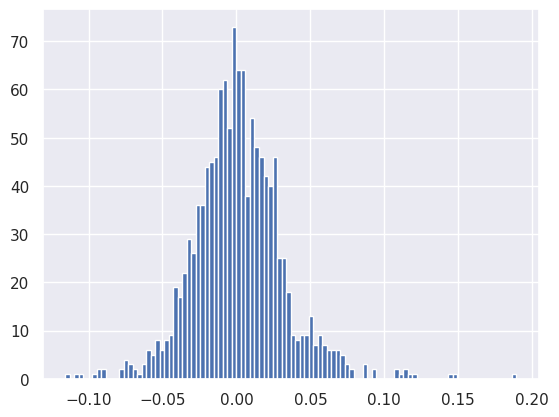

In [47]:
df.Daily_change.hist(bins=100)

<Axes: xlabel='Date'>

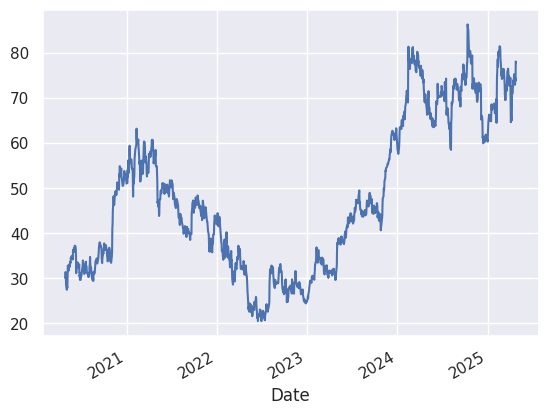

In [48]:
df.Close.plot()